In [30]:
import pandas as pd
import seaborn as sns
import numpy as np

<h3>First lest read our csv and see the data it has.</h3>
<p> For that we simple use the method .read_csv from pandas 
and just print the data <br> using the head() method that by default brings the frist 5 rows </p>

In [31]:
df = pd.read_csv('materials/Cars.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


<h3>Then we can inspect the typof each column </h3>
<p> First we get some basic stats from the numeric columns and after that we check the data types of the dataframe. We see that there are some data objects, for the strings, float columns which means they have some decimals and other columns that are integers </p>

In [32]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


<h4>Now that we known the data type of each column we can transform some of object columns into numbers so we can later use for some EDA  and also for our regression model. </h4>

In [34]:
## For the column owner first we get the unique values for this column so we can 
## know the values we need to map.
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [35]:
## Now that we known the unique values, we are going to map it as 
## from 1 to 5. Doing this maybe is not a good idea since we are
## indicating to the model that there is a clear relationship with this values
ownership_mapping = {'First Owner':1, 'Second Owner':2, 'Third Owner':3,
                     'Fourth & Above Owner':4, 'Test Drive Car':5}

In [36]:
df['owner'] = df['owner'].map(ownership_mapping)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [37]:
## we check that we actually did it.
df['owner'].unique()

array([1, 2, 3, 4, 5])

<h4> now we do some aditional data cleaning with the other columns </h4>

In [38]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [39]:
## Next, for this exercise we will remove the cars that use CNG, LPG
## as a fuel type. This is because they use a different way of mileage (km/kg)
## and we are interested in the types that use the traditional way

## we just select Disel and Petrol from the original dataset 
## and make a subset 
df_subset = df[df['fuel'].isin(['Diesel', 'Petrol'])].copy()
df_subset['fuel'].unique()

array(['Diesel', 'Petrol'], dtype=object)

In [40]:
## now for the mileage column we need to remove the string
## 'kmpl' and later convert the result to a floating number
df_subset['mileage'] = df_subset['mileage'].str.replace('kmpl','').str.strip().astype(float)
df_subset['mileage']

0       23.40
1       21.14
2       17.70
3       23.00
4       16.10
        ...  
8123    18.50
8124    16.80
8125    19.30
8126    23.57
8127    23.57
Name: mileage, Length: 8033, dtype: float64

In [41]:
## we do the same for the engine column and power
df_subset['engine'] = df_subset['engine'].str.replace('CC','').str.strip().astype(float)
df_subset['max_power'] = df_subset['max_power'].str.replace('bhp','').str.strip().astype(float)
df_subset['name'] = df_subset['name'].str.slice(stop=1)
df_subset = df_subset.rename(columns={'name':'Car brand'})
df_subset.head()

,Car brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,M,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,S,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,H,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,H,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,M,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [42]:
## to make things easier for this exercise we will drop the torque column
df_subset.drop(['torque'],axis=1,inplace=True)
df_subset.head()

,Car brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,M,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,S,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,H,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,H,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,M,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [43]:
## Now for the selling price, we will transform it with the log
## function, this will help us to reduce the range of the selling 
## price, so our model can predict better, later for the final result
## we can conver again using the exp function. 
df_subset['selling_price'] = np.log(df_subset['selling_price'])

## we will do the same with the km_driven since the order of 
## magnitude is similar to the selling price 
df_subset['km_driven'] = np.log(df_subset['km_driven'])


df_subset['engine'] = np.log(df_subset['engine'])
df_subset['car old'] = 2025 - df_subset['year'] 
df_subset.head()

,Car brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car old
0,M,2014,13.017003,11.887931,Diesel,Individual,Manual,1,23.40,7.129298,74.00,5.0,11
1,S,2014,12.821258,11.695247,Diesel,Individual,Manual,2,21.14,7.311886,103.52,5.0,11
2,H,2006,11.970350,11.849398,Petrol,Individual,Manual,3,17.70,7.311218,78.00,5.0,19
3,H,2010,12.323856,11.751942,Diesel,Individual,Manual,1,23.00,7.241366,90.00,5.0,15
4,M,2007,11.775290,11.695247,Petrol,Individual,Manual,1,16.10,7.168580,88.20,5.0,18


## *2. EDA (Exploratory Data Analysis)* 

In [44]:
import matplotlib.pyplot as plt

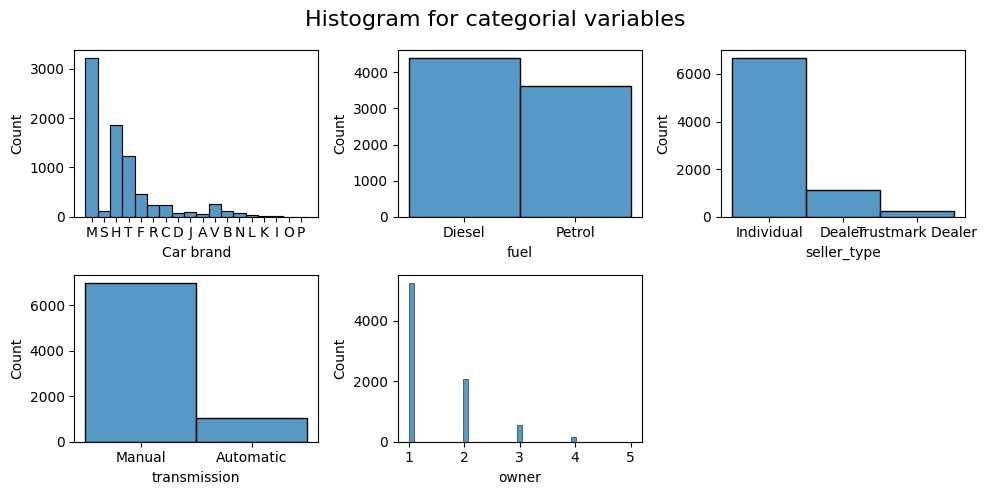

In [45]:
### First lest undesrtand our data so later we can decide the features we will choose for our model
### we start with the categorical variables, including the ones we already mapped

## in this part of the code we select the columns that object data type
cat_col = df_subset.select_dtypes(exclude=['int64', 'float64'])
column_names_cat = list(cat_col.columns)
## then we append or add the owner column, since we changed to numerical value before
column_names_cat.append('owner') 

## here we are just iterating over the categorical values and making a graph 
## with each of them. For this case the graph is a histogram
fig = plt.figure(figsize=(10, 5))
for idx, func in enumerate(column_names_cat, start=1):  
    ax = fig.add_subplot(2, 3, idx) 
    sns.histplot(data=df_subset, x=func)
    #ax.set_title(func)

fig.suptitle('Histogram for categorial variables', fontsize=16)
fig.tight_layout()




<h4>With the last plot we can see that this five features are <em><strong>unbalanced</strong> <br>
For now there isn't much we can do with this variables. Now let's see how the five variables response to <br>
the selling price. </em></h4>

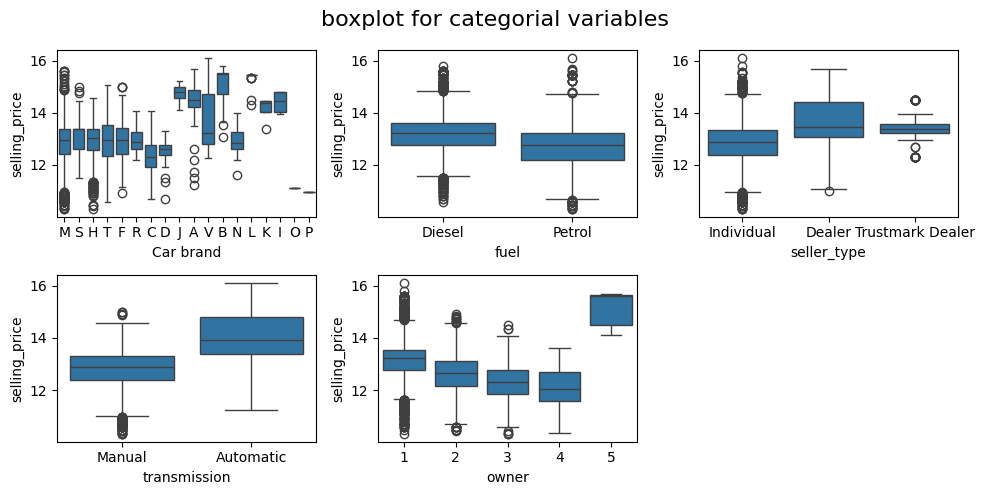

In [46]:
## here we do same than the last step but instead of a histogram
## now we have a boxplot, to see the distribution of the selling price

fig = plt.figure(figsize=(10, 5))
for idx, func in enumerate(column_names_cat, start=1):  
    ax = fig.add_subplot(2, 3, idx) 
    sns.boxplot(data=df_subset, x=func, y='selling_price')
    #ax.set_title(func)

fig.suptitle('boxplot for categorial variables', fontsize=16)
fig.tight_layout()

<h4>We can cleary see that most of this variables are indeed importat for the selling price.<br>
some car brands that can have similar selling price, with some exceptions.<br>
Something else that I notice here is that for the 
transmission type the Manual cars has more lower outlayers than high,<br> and their distribution is disperse while the higher outliers are apparently less
and are more concentrated in a range of price. 

Now let's explore the numerical variables</em>.</h4>

In [47]:
## first we select the numerical variables and exclude the owner and selling price columns
## the owner column we used for categorial variables and selling is our target.
num_col = df_subset.select_dtypes(include=['int64', 'float64'])
column_names_num = list(num_col.columns)
column_names_num = [fea for fea in column_names_num if fea not in ['owner', 'selling_price']]

column_names_num


['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'car old']

In [48]:
## we want to plot the selling price with all numerical values and also
## different hues, copy pasting the same code over and over again it's not
## that good so this function will help us.

def generate_scatter(column, hue, title):
    ## column: list of numerical columns for the x axis
    ## hue: this corresponds to the categorial value, the color of the dots will be different
    ## title: just the title of the plot

    fig = plt.figure(figsize=(10, 5))

    for idx, func in enumerate(column, start=1): 
        ax = fig.add_subplot(3, 3, idx) 
        sns.scatterplot(data=df_subset, x=func, y="selling_price", hue=hue, ax=ax)
        ax.get_legend().remove()
    
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='outside center right',title=hue)
    

    fig.suptitle(title, fontsize=16)
    fig.tight_layout(rect=[0, 0, 0.85, 0.95])

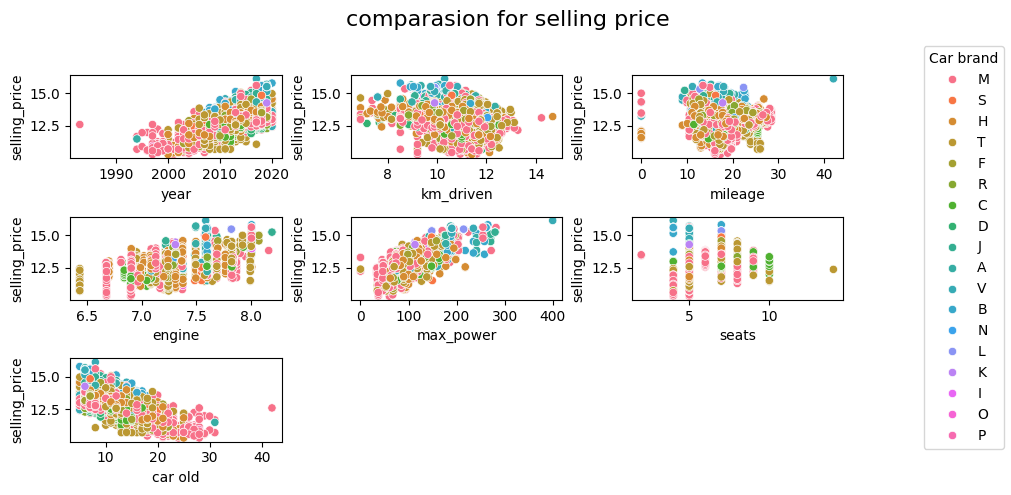

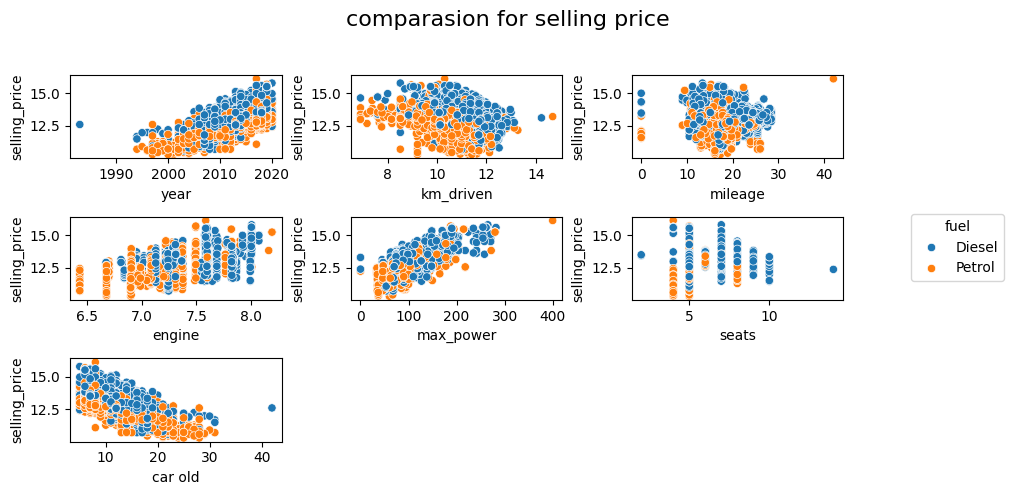

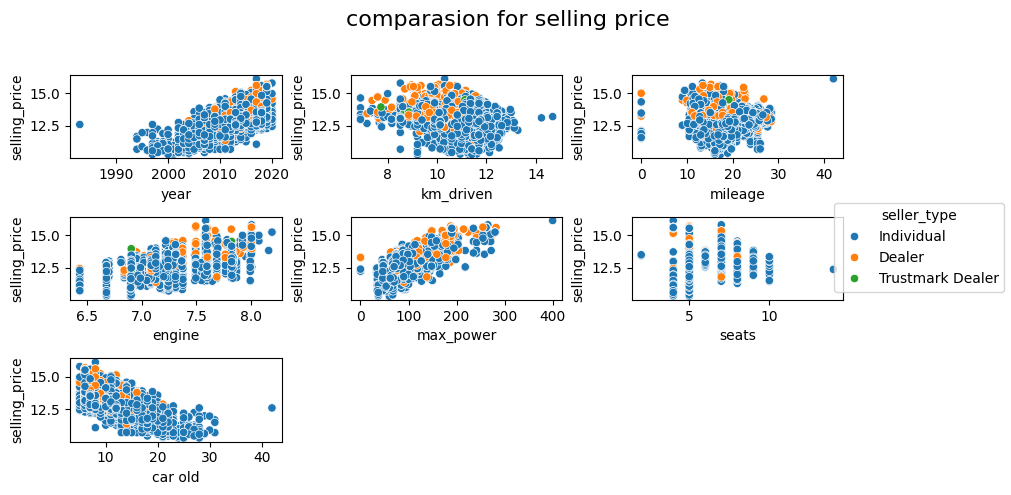

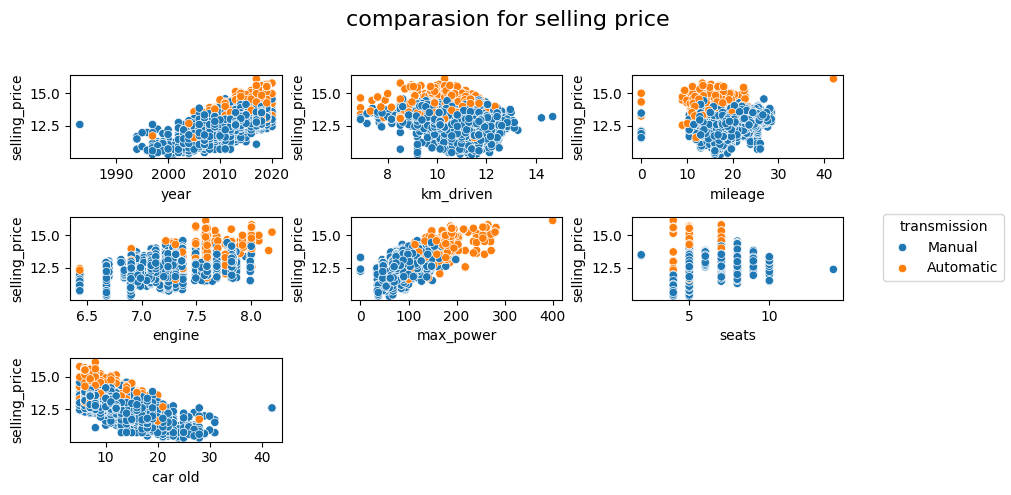

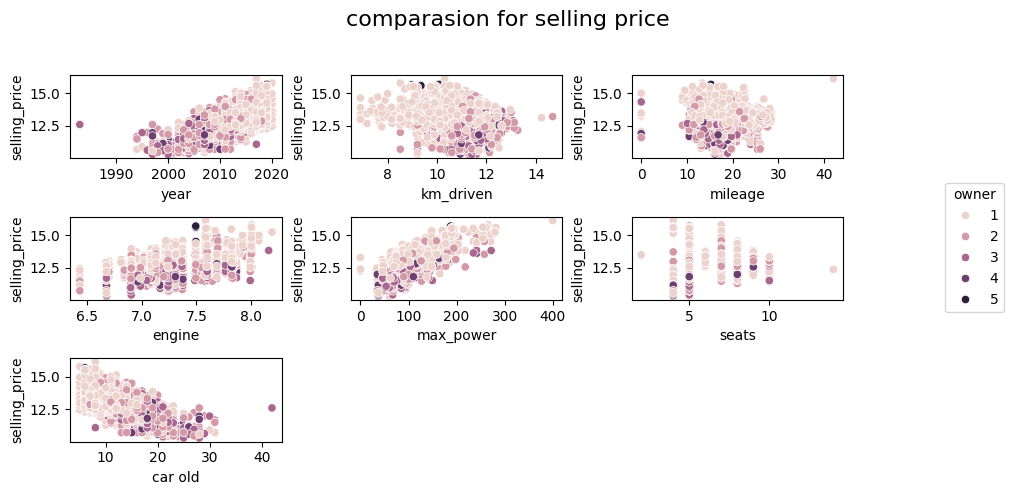

In [49]:
for cat in column_names_cat:
    generate_scatter(column_names_num, cat,'comparasion for selling price')

<h4>Now that we compared the selling price with more variables we can have a better idea of which features we can select.<br>
for our model. For example, the car brand doesn't look that good, aslo the km driven looks like will add some confusion to the model.<br>
But features like the year, max power and engine can actually be good<br> <br>

Other thing that we can see overall it's that the selling price for the test driving cars is really high, and as was already<br> suggested in the 
task assignment we will delete the rows for this.
</em></h4>



In [50]:
## We are going to print our dataset again, since the last one is couple cells up and 
## we don't want to go up and go down
df_subset = df_subset[df_subset['owner'] != 5] 
df_subset.head()

,Car brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car old
0,M,2014,13.017003,11.887931,Diesel,Individual,Manual,1,23.40,7.129298,74.00,5.0,11
1,S,2014,12.821258,11.695247,Diesel,Individual,Manual,2,21.14,7.311886,103.52,5.0,11
2,H,2006,11.970350,11.849398,Petrol,Individual,Manual,3,17.70,7.311218,78.00,5.0,19
3,H,2010,12.323856,11.751942,Diesel,Individual,Manual,1,23.00,7.241366,90.00,5.0,15
4,M,2007,11.775290,11.695247,Petrol,Individual,Manual,1,16.10,7.168580,88.20,5.0,18


In [51]:
df_subset['owner'].unique()

array([1, 2, 3, 4])

In [52]:
## Now we want to see the correlation matrix, for that we want to include some categorial variables
## that we still have as strings, like the transmission, fuel 
## so we have to convert this variables to numerical, so we are going to use 
## the sklearn library 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
values_transmission = list(df_subset["transmission"].unique())
values_fuel = list(df_subset["fuel"].unique())

df_subset["transmission"] = le.fit_transform(df_subset["transmission"])
print(f'new values for {le.classes_} - {le.transform(values_transmission)} ')

df_subset["fuel"] = le.fit_transform(df_subset["fuel"])
print(f'new values for {le.classes_} - {le.transform(values_fuel)} ')


new values for ['Automatic' 'Manual'] - [1 0] 
new values for ['Diesel' 'Petrol'] - [0 1] 


In [53]:
## now that we have new "numerical" variables we need to 
## recalculate the num_col variable
num_col = df_subset.select_dtypes(include=['int64', 'float64'])
num_col


,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats,car old
0,2014,13.017003,11.887931,0,1,1,23.40,7.129298,74.00,5.0,11
1,2014,12.821258,11.695247,0,1,2,21.14,7.311886,103.52,5.0,11
2,2006,11.970350,11.849398,1,1,3,17.70,7.311218,78.00,5.0,19
3,2010,12.323856,11.751942,0,1,1,23.00,7.241366,90.00,5.0,15
4,2007,11.775290,11.695247,1,1,1,16.10,7.168580,88.20,5.0,18
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,12.676076,11.608236,1,1,1,18.50,7.087574,82.85,5.0,12
8124,2007,11.813030,11.686879,0,1,4,16.80,7.308543,110.00,5.0,18
8125,2009,12.853176,11.695247,0,1,1,19.30,7.129298,73.90,5.0,16
8126,2013,12.577636,10.126631,0,1,1,23.57,7.241366,70.00,5.0,12


<Axes: >

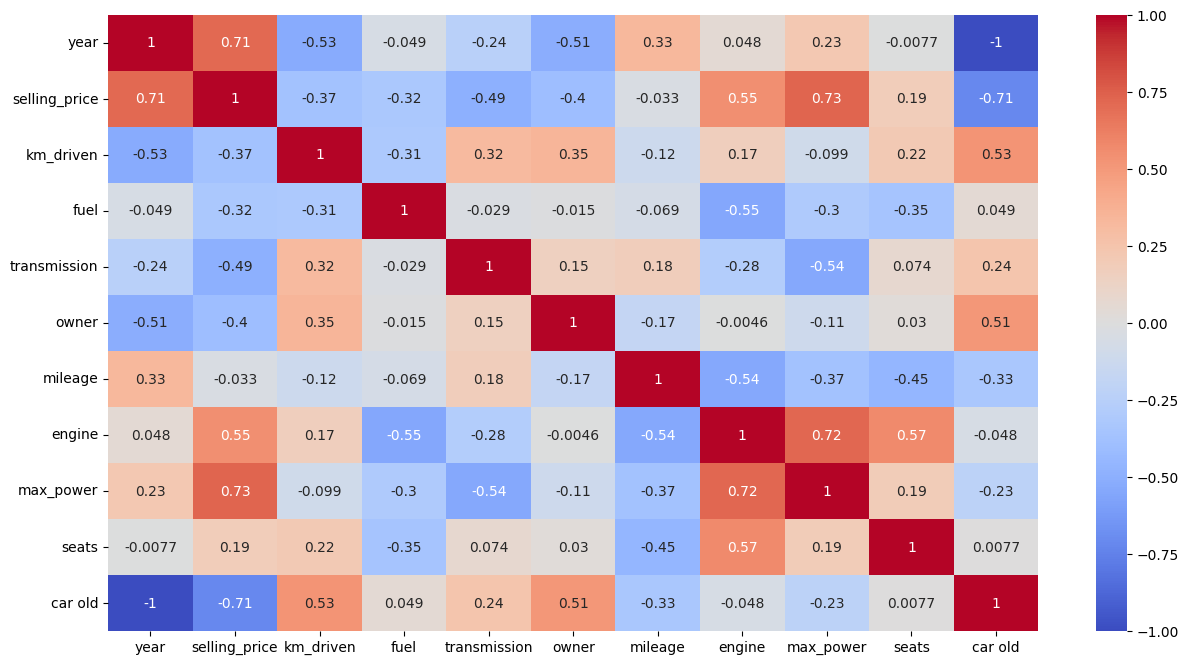

In [54]:
# Let's check out heatmap
plt.figure(figsize = (15,8))
sns.heatmap(num_col.corr(), annot=True, cmap="coolwarm")

<h4>This correlation matix gives us a good summary of the different variables and ther relationship with others.<br>
Variables like the <strong>year, engine and max power </strong> has a very good positive correlation.<br>
and other variables like the <strong>transmission, owner, km_driven and fuel </strong>have a negative correlation<br> <br>
</em></h4>

## *3. Feature selection and Preprocessing* 

In [55]:
# x are the variables that will help us with the prediction
# year	km_driven	fuel	transmission	owner	mileage	engine	max_power	seats
X = df_subset[['car old','engine','max_power','transmission','owner', 'km_driven','fuel']]

# y the variable we want to predict
y = df_subset["selling_price"]

In [56]:
# in this part of the code we are splitting the dataset into train and test,
# we should also get a validation set for the training but for now we are not doing it

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 8)


<h4>Now that we split our dataset, we have to check for the null values.<br>
and think about a way of handling with it, one way could be filling those values<br>
or other one could be just dropping this values, this can be a good option <br>
if our dataset is big enough.<br></h4>

In [57]:
print(f'{"#"*5} null data for X_train {"#"*5}')
print(f'{X_train.isnull().sum()}\n')
print(f'{"#"*5} null data for x_test {"#"*5}')
print(f'{X_test.isnull().sum()}\n')

##### null data for X_train #####
car old           0
engine          156
max_power       153
transmission      0
owner             0
km_driven         0
fuel              0
dtype: int64

##### null data for x_test #####
car old          0
engine          58
max_power       55
transmission     0
owner            0
km_driven        0
fuel             0
dtype: int64



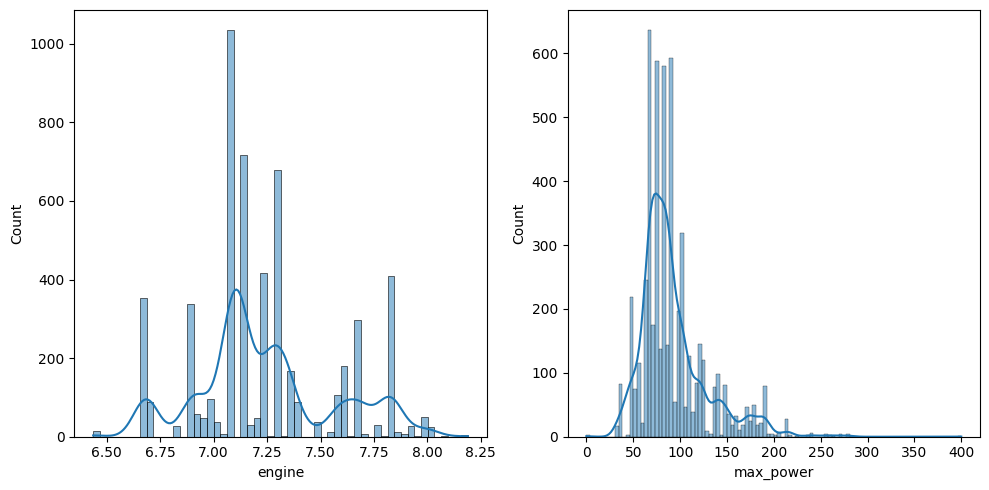

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Create a single row with 2 subplots

for idx, func in enumerate(['engine', 'max_power']):
    sns.histplot(data=X_train, x=func, ax=axes[idx], kde=True)  # Use axes[idx] for each subplot

plt.tight_layout()  # Adjust spacing between plots
plt.show()

<h4>For the max_power filling the values with the median looks ok since the distribution looks normal.<br>
for the engine variable, looks like is skewed to the right or can be also binomial?  <br>
for this exercise we are going to fill both variables with the median keeping in mind that <br>
for the second variable we would need so explore more options.<br></h4>

In [59]:
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)

/var/folders/5b/96qvplr947zblygp48jygfr40000gn/T/ipykernel_12129/926841912.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['engine'].fillna(X_train['engine'].median(), inplace=True)
/var/folders/5b/96qvplr947zblygp48jygfr40000gn/T/ipykernel_12129/926841912.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

In [60]:
## now we are going to check if we changed the distribution of the dataset while 
## filling the nule values and also check if we filled everything
print(f'{"#"*5} null data for X_train {"#"*5}')
print(f'{X_train.isnull().sum()}\n')

##### null data for X_train #####
car old         0
engine          0
max_power       0
transmission    0
owner           0
km_driven       0
fuel            0
dtype: int64



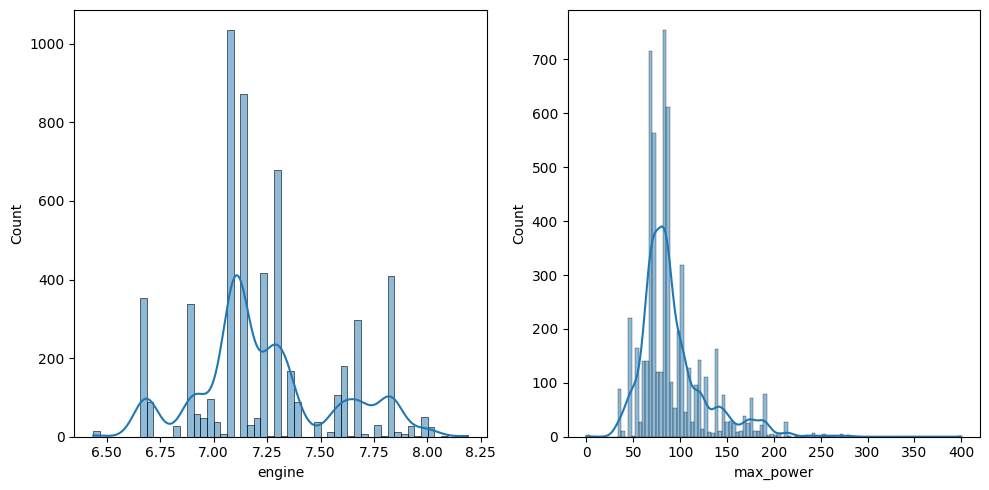

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Create a single row with 2 subplots

for idx, func in enumerate(['engine', 'max_power']):
    sns.histplot(data=X_train, x=func, ax=axes[idx], kde=True)  # Use axes[idx] for each subplot

plt.tight_layout()  # Adjust spacing between plots
plt.show()

<h4>Now we do the same for the X_test</h4>

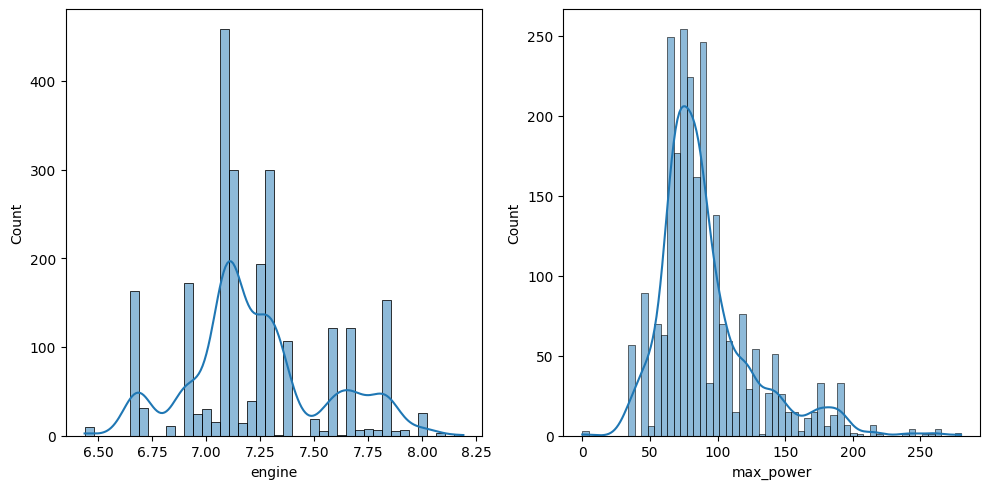

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Create a single row with 2 subplots

for idx, func in enumerate(['engine', 'max_power']):
    sns.histplot(data=X_test, x=func, ax=axes[idx], kde=True)  # Use axes[idx] for each subplot

plt.tight_layout()  # Adjust spacing between plots
plt.show()

In [63]:
X_test['engine'].fillna(X_train['engine'].median(), inplace=True)
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)

/var/folders/5b/96qvplr947zblygp48jygfr40000gn/T/ipykernel_12129/2777658016.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test['engine'].fillna(X_train['engine'].median(), inplace=True)
/var/folders/5b/96qvplr947zblygp48jygfr40000gn/T/ipykernel_12129/2777658016.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

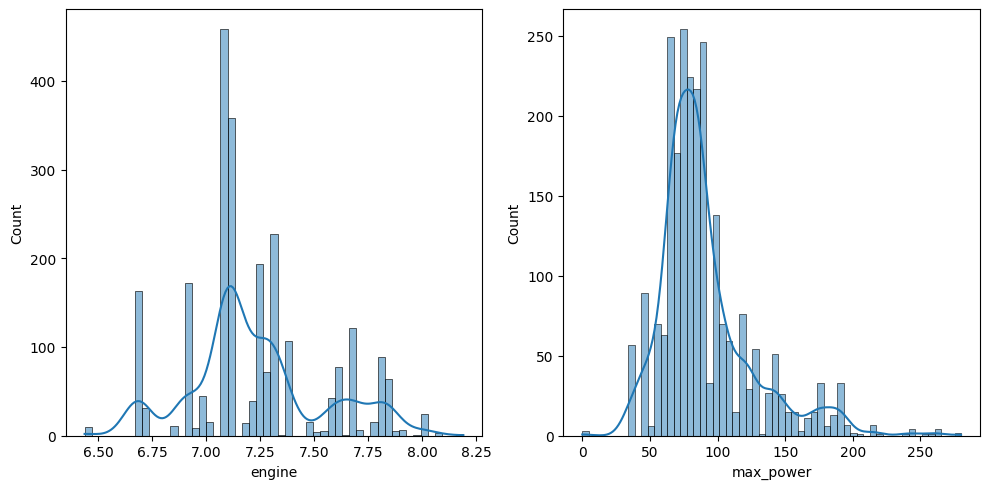

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Create a single row with 2 subplots

for idx, func in enumerate(['engine', 'max_power']):
    sns.histplot(data=X_test, x=func, ax=axes[idx], kde=True)  # Use axes[idx] for each subplot

plt.tight_layout()  # Adjust spacing between plots
plt.show()

In [65]:
print(f'{"#"*5} null data for x_test {"#"*5}')
print(f'{X_test.isnull().sum()}\n')

##### null data for x_test #####
car old         0
engine          0
max_power       0
transmission    0
owner           0
km_driven       0
fuel            0
dtype: int64



<h4>So we see that for training and testing we didn't change the distribution <br>
after filling the missing values, that's actually good. Now for the missing values of y  <br>
we don't have to fill it so we will delete those values with their respective x values</h4>

In [66]:
print(f'{"#"*5} null data for y_test {"#"*5}')
print(f'null: {y_test.isnull().sum()}\n')

print(f'{"#"*5} null data for y_train {"#"*5}')
print(f'null: {y_train.isnull().sum()}\n')


## looks like we don't actually have missing values here


##### null data for y_test #####
null: 0

##### null data for y_train #####
null: 0



In [67]:
## now we want to check the number of outliers we have for each column of our dataset
## for this we will borrow one of the functions from class since it's very helpful
## we just are going to add a small modifictaion to the text we are printing.

def outlier_count(col,data_type, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        ## here we implement the new way of doing this in python3, and also looks better
        print(f"\n{15*'-'} data for {col} - {data_type} {15*'-'}")
        print(f'Number of outliers for {data_type}: {outlier_count}')
        print(f'Percent of data that is outlier for {data_type}: {outlier_percent}%')

In [68]:
### we check the number of outliers for X_train and y X_test
### for this we just need to change the dataset, since both have
### same columns 
for col in X_train.columns:
    outlier_count(col,'X_train',X_train )
    outlier_count(col,'X_test',X_test )
    print(f"\n{'#'*15} change of column {'#'*15}")


--------------- data for car old - X_train ---------------
Number of outliers for X_train: 140
Percent of data that is outlier for X_train: 2.49%

--------------- data for car old - X_test ---------------
Number of outliers for X_test: 24
Percent of data that is outlier for X_test: 1.0%

############### change of column ###############

--------------- data for engine - X_train ---------------
Number of outliers for X_train: 555
Percent of data that is outlier for X_train: 9.88%

--------------- data for engine - X_test ---------------
Number of outliers for X_test: 541
Percent of data that is outlier for X_test: 22.46%

############### change of column ###############

--------------- data for max_power - X_train ---------------
Number of outliers for X_train: 411
Percent of data that is outlier for X_train: 7.31%

--------------- data for max_power - X_test ---------------
Number of outliers for X_test: 178
Percent of data that is outlier for X_test: 7.39%

############### change of

In [69]:
### we can see that both datasets have same number of outliers, and for the engine variable this values are
### very high. For now we are going to train our model with this variable like this and see the results.
### if we have bad results we can come back to this variable and make something with those values


### now we are going to scale our dataset

from sklearn.preprocessing import StandardScaler

# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [70]:
### Let's check shapes of all X_train, X_test, y_train, y_test
### we see that the shapes are consistent, this is very importat for the model
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 7)
Shape of X_test:  (2409, 7)
Shape of y_train:  (5619,)
Shape of y_test:  (2409,)


## *4. Modeling (finally)* 

In [71]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

print("MSE: ", mean_squared_error(y_test, yhat))
print("r2: ", r2_score(y_test, yhat))


MSE:  0.09298176919613922
r2:  0.870971317716089


In [72]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Libraries for model evaluation

# models that we will be using, put them in a list
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0), 
              RandomForestRegressor(n_estimators = 100, random_state = 0)]

# The names of the models
algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]

In [73]:
from sklearn.model_selection import KFold, cross_val_score

#lists for keeping mse
train_mse = []
test_mse = []

#defining splits
kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Linear Regression - Score: [-0.09381416 -0.08649687 -0.09775346 -0.10240697 -0.09459321]; Mean: -0.09501293518834614
SVR - Score: [-0.08204635 -0.0775513  -0.06713262 -0.074949   -0.07837939]; Mean: -0.07601173536290193
KNeighbors Regressor - Score: [-0.07741189 -0.08269686 -0.07967525 -0.07886558 -0.08486831]; Mean: -0.08070357663732201
Decision-Tree Regressor - Score: [-0.0963107  -0.08439064 -0.09205599 -0.09136411 -0.07700286]; Mean: -0.08822485976554283
Random-Forest Regressor - Score: [-0.05156035 -0.05427313 -0.05213513 -0.06060637 -0.05729828]; Mean: -0.05517465135205622


<h4>Looking at the metrics of different regression models RF performs the best, followed by  <br>
SVR, K-Neighboors, Decision Trees and last linear regression  <br></h4>

In [74]:
### we now are going to try with grid search
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rf = RandomForestRegressor(random_state = 1)

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')

# Fit your grid_search
grid.fit(X_train, y_train);  #fit means start looping all the possible parameters

In [75]:
grid.best_params_

{'bootstrap': True, 'max_depth': 10, 'n_estimators': 15}

In [76]:
# Find your grid_search's best score
best_mse = grid.best_score_
best_mse  # ignore the minus because it's neg_mean_squared_error

np.float64(-0.05710991450139147)

## *4. Testing the model* 

In [77]:
yhat = grid.predict(X_test)
mean_squared_error(y_test, yhat)

0.058643818653931666

## *5. Analysis: Feature Importance* 

In [78]:
#stored in this variable
#note that grid here is random forest

## 'year','engine','max_power','transmission','owner', 'km_driven','fuel'
## we put here our x variables so we can remember it
rf = grid.best_estimator_
rf.feature_importances_

array([0.44807252, 0.04838996, 0.47211963, 0.00213975, 0.00394808,
       0.01950544, 0.00582461])

Text(0.5, 0, 'Random Forest Feature Importance')

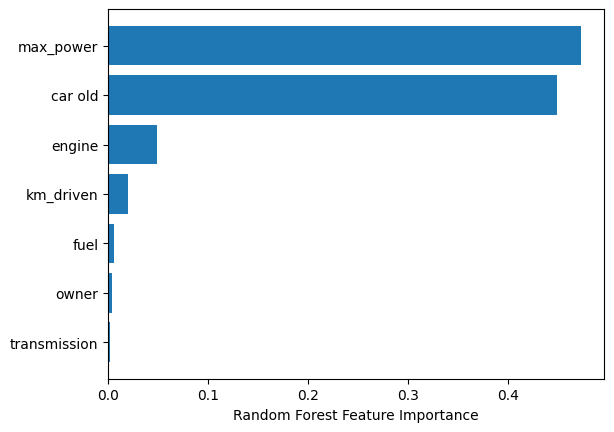

In [79]:
#let's plot
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## looks like the max_power is a good predictor, then year
## and then the engine

## *6. Inference* 

In [80]:
import pickle

# save the model to disk
filename = 'model/car-price.model'
pickle.dump(grid, open(filename, 'wb'))

In [81]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [82]:
### let's try to create one silly example
### 'year','engine','max_power','transmission','owner', 'km_driven','fuel'
### ownership_mapping = {'First Owner':1, 'Second Owner':2, 'Third Owner':3,
###                     'Fourth & Above Owner':4, 'Test Drive Car':5}
### ['Automatic' 'Manual'] - [1 0] 
### ['Diesel' 'Petrol'] - [0 1] 

df.loc[2]

name             Honda City 2017-2020 EXi
year                                 2006
selling_price                      158000
km_driven                          140000
fuel                               Petrol
seller_type                    Individual
transmission                       Manual
owner                                   3
mileage                         17.7 kmpl
engine                            1497 CC
max_power                          78 bhp
torque              12.7@ 2,700(kgm@ rpm)
seats                                 5.0
Name: 2, dtype: object

In [91]:
np.log(140000)

np.float64(11.84939770159144)

In [96]:
### 'year','engine','max_power','transmission','owner', 'km_driven','fuel'
sample = np.array([[2006, 1497, 78, 0, 3, 0, 1]])

In [97]:
predicted_price_car = loaded_model.predict(sample)
np.exp(predicted_price_car)

array([4852350.92246931])